 # 3-Regression-Öğrenci Not Tahmini
Eğitmenlerin öğrencilerin öğrenci notlarının düşük olduğu tahmin edilen konulara hazırlanmasına yardımcı olabilmesi için öğrenci notlarını tahmin etme görevi için makine öğrenimini kullanabiliriz.

<img src= "education.png">

**Projenin Amacı:**
Bu proje, öğrencilerin final notlarını tahmin etmek için makine öğrenimi kullanarak bir model oluşturmayı amaçlar. Projenin genel amacı, öğrencilerin akademik başarılarını daha iyi anlamak ve gerektiğinde öğrencilere destek sağlamak için veri analizi ve tahmin yapma süreçlerini kullanmaktır.

**Yapılacaklar:**

1. **Veri Kümesini İnceleme:**
   - Veri kümesini inceleyerek hangi özelliklerin bulunduğunu ve verinin genel yapısını anlamak.
2. **Veriye Erişim:**
   - Pandas kütüphanesi kullanarak veri kümesini içe aktarma.
3. **Veri Ön İşleme:**
   - Eksik verileri ele alma ve gereksiz sütunları kaldırma.
   - Özellikleri eğitim ve test verilerine bölebiliriz.
4. **Model Oluşturma:**
   - Öğrenci notlarını tahmin etmek için bir regresyon modeli oluşturma (örneğin, Linear Regression).
5. **Modeli Eğitme:**
   - Modeli eğitim verileriyle eğitme.
6. **Modeli Değerlendirme:**
   - Modelin performansını değerlendirme (örneğin, ortalama kare kök hatası - RMSE).
   - Modelin ne kadar iyi tahminler yaptığını anlamak için test verileri üzerinde tahminler yapma.
7. **Tahminler Yapma:**
   - Modeli kullanarak yeni öğrenci bilgileriyle tahminler yapma.
8. **Sonuçları İnceleme:**
   - Modelin tahminlerini ve sonuçlarını değerlendirme.
   - Elde edilen bilgileri kullanarak öğrencilere daha fazla destek sağlama veya kararlar almayı düşünme.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns",100)

## 1. **Veri Kümesini İnceleme:**

In [10]:
df=pd.read_csv("master_student-mat.csv")

In [11]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10


### Sutun bilgileri:
Eski Sütun İsimleri (İngilizce) - Yeni Sütun İsimleri (Türkçe):
1. school - okul
2. sex - cinsiyet
3. age - yaş
4. address - adres
5. famsize - aile boyutu
6. Pstatus - ebeveynlerin medeni durumu
7. Medu - anne eğitim seviyesi
8. Fedu - baba eğitim seviyesi
9. Mjob - anne mesleği
10. Fjob - baba mesleği
11. reason - okulu seçme nedeni
12. guardian - vasi
13. traveltime - okula seyahat süresi
14. studytime - haftalık çalışma süresi
15. failures - önceki sınıflarda başarısızlık sayısı
16. schoolsup - okul desteği
17. famsup - aile desteği
18. paid - ek ders ücreti ödeme
19. activities - okul dışı aktiviteler
20. nursery - kreşe devam
21. higher - yükseköğrenim isteği
22. internet - internet erişimi
23. romantic - romantik ilişki
24. famrel - aile ilişkileri
25. freetime - boş zaman
26. goout - dışarı çıkma sıklığı
27. Dalc - hafta içi alkol tüketimi
28. Walc - hafta sonu alkol tüketimi
29. health - genel sağlık durumu
30. absences - devamsızlık
31. G1 - birinci dönem notları
32. G2 - ikinci dönem notları
33. G3 - final notları

In [12]:
# Veri çerçevesi sütun adlarını değiştirme (isteğe göre yapılabilir)
df.rename(columns={
    'school': 'okul',
    'sex': 'cinsiyet',
    'age': 'yaş',
    'address': 'adres',
    'famsize': 'aile_boyutu',
    'Pstatus': 'ebeveynlerin_medeni_durumu',
    'Medu': 'anne_eğitim_seviyesi',
    'Fedu': 'baba_eğitim_seviyesi',
    'Mjob': 'anne_mesleği',
    'Fjob': 'baba_mesleği',
    'reason': 'okulu_seçme_nedeni',
    'guardian': 'vasi',
    'traveltime': 'okula_seyahat_süresi',
    'studytime': 'haftalık_çalışma_süresi',
    'failures': 'önceki_başarısızlık_sayısı',
    'schoolsup': 'okul_desteği',
    'famsup': 'aile_desteği',
    'paid': 'ek_ders_ücreti_ödeme',
    'activities': 'okul_dışı_aktiviteler',
    'nursery': 'kreşe_devam',
    'higher': 'yükseköğrenim_isteği',
    'internet': 'internet_erişimi',
    'romantic': 'romantik_ilişki',
    'famrel': 'aile_ilişkileri',
    'freetime': 'boş_zaman',
    'goout': 'dışarı_çıkma_sıklığı',
    'Dalc': 'hafta_içi_alkol_tüketimi',
    'Walc': 'hafta_sonu_alkol_tüketimi',
    'health': 'genel_sağlık_durumu',
    'absences': 'devamsızlık',
    'G1': 'birinci_dönem_notları',
    'G2': 'ikinci_dönem_notları',
    'G3': 'final_notları'
}, inplace=True)

In [13]:
df.sample(7)

,okul,cinsiyet,yaş,adres,aile_boyutu,ebeveynlerin_medeni_durumu,anne_eğitim_seviyesi,baba_eğitim_seviyesi,anne_mesleği,baba_mesleği,okulu_seçme_nedeni,vasi,okula_seyahat_süresi,haftalık_çalışma_süresi,önceki_başarısızlık_sayısı,okul_desteği,aile_desteği,ek_ders_ücreti_ödeme,okul_dışı_aktiviteler,kreşe_devam,yükseköğrenim_isteği,internet_erişimi,romantik_ilişki,aile_ilişkileri,boş_zaman,dışarı_çıkma_sıklığı,hafta_içi_alkol_tüketimi,hafta_sonu_alkol_tüketimi,genel_sağlık_durumu,devamsızlık,birinci_dönem_notları,ikinci_dönem_notları,final_notları
210,GP,F,19,U,GT3,T,3,3,other,other,reputation,other,1,4,0,no,yes,yes,yes,yes,yes,yes,no,4,3,3,1,2,3,10,8,8,8
336,GP,F,19,R,GT3,A,3,1,services,at_home,home,other,1,3,1,no,no,yes,no,yes,yes,no,no,5,4,3,1,2,5,12,14,13,13
147,GP,F,15,U,GT3,T,1,2,at_home,other,course,mother,1,2,0,no,yes,yes,no,no,yes,yes,no,4,3,2,1,1,5,2,10,11,11
82,GP,F,15,U,LE3,T,3,2,services,other,reputation,mother,1,2,0,no,yes,yes,no,yes,yes,yes,no,4,4,4,1,1,5,10,7,6,6
270,GP,F,19,U,GT3,T,3,3,other,services,home,other,1,2,2,no,yes,yes,yes,yes,yes,yes,no,4,3,5,3,3,5,15,9,9,9
276,GP,F,18,R,GT3,A,3,2,other,services,home,mother,2,2,0,no,no,no,no,no,no,yes,yes,4,1,1,1,1,5,75,10,9,9
234,GP,M,16,U,LE3,T,1,1,other,other,home,mother,2,2,0,no,yes,yes,no,yes,yes,yes,no,3,4,2,1,1,5,18,9,7,6


In [14]:
# "yes" ve "no" içeren sütunları 1 ve 0 ile değiştirme
columns_to_convert = ["okul_desteği", "aile_desteği", "ek_ders_ücreti_ödeme", "okul_dışı_aktiviteler", "kreşe_devam", "yükseköğrenim_isteği", "internet_erişimi", "romantik_ilişki"]

for column in columns_to_convert:
    df[column] = df[column].replace({"yes": 1, "no": 0})


In [15]:
df.tail(3)

,okul,cinsiyet,yaş,adres,aile_boyutu,ebeveynlerin_medeni_durumu,anne_eğitim_seviyesi,baba_eğitim_seviyesi,anne_mesleği,baba_mesleği,okulu_seçme_nedeni,vasi,okula_seyahat_süresi,haftalık_çalışma_süresi,önceki_başarısızlık_sayısı,okul_desteği,aile_desteği,ek_ders_ücreti_ödeme,okul_dışı_aktiviteler,kreşe_devam,yükseköğrenim_isteği,internet_erişimi,romantik_ilişki,aile_ilişkileri,boş_zaman,dışarı_çıkma_sıklığı,hafta_içi_alkol_tüketimi,hafta_sonu_alkol_tüketimi,genel_sağlık_durumu,devamsızlık,birinci_dönem_notları,ikinci_dönem_notları,final_notları
392,MS,M,21,R,GT3,T,1,1,other,other,course,other,1,1,3,0,0,0,0,0,1,0,0,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,course,mother,3,1,0,0,0,0,0,0,1,1,0,4,4,1,3,4,5,0,11,12,10
394,MS,M,19,U,LE3,T,1,1,other,at_home,course,father,1,1,0,0,0,0,0,1,1,1,0,3,2,3,3,3,5,5,8,9,9


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   okul                        395 non-null    object
 1   cinsiyet                    395 non-null    object
 2   yaş                         395 non-null    int64 
 3   adres                       395 non-null    object
 4   aile_boyutu                 395 non-null    object
 5   ebeveynlerin_medeni_durumu  395 non-null    object
 6   anne_eğitim_seviyesi        395 non-null    int64 
 7   baba_eğitim_seviyesi        395 non-null    int64 
 8   anne_mesleği                395 non-null    object
 9   baba_mesleği                395 non-null    object
 10  okulu_seçme_nedeni          395 non-null    object
 11  vasi                        395 non-null    object
 12  okula_seyahat_süresi        395 non-null    int64 
 13  haftalık_çalışma_süresi     395 non-null    int64 

In [19]:
# gereksiz olan sutunları kaldıralım:
# Kaldırmak istediğiniz sütunların listesi
sütunlar_kaldir = ["okul", "cinsiyet", "yaş", "adres", "aile_boyutu", "ebeveynlerin_medeni_durumu",
                   "anne_mesleği", "baba_mesleği", "okulu_seçme_nedeni", "vasi"]

# Belirtilen sütunları kaldırma
df = df.drop(columns=sütunlar_kaldir)

In [20]:
df.shape

(395, 23)

In [22]:
df.describe()

,anne_eğitim_seviyesi,baba_eğitim_seviyesi,okula_seyahat_süresi,haftalık_çalışma_süresi,önceki_başarısızlık_sayısı,okul_desteği,aile_desteği,ek_ders_ücreti_ödeme,okul_dışı_aktiviteler,kreşe_devam,yükseköğrenim_isteği,internet_erişimi,romantik_ilişki,aile_ilişkileri,boş_zaman,dışarı_çıkma_sıklığı,hafta_içi_alkol_tüketimi,hafta_sonu_alkol_tüketimi,genel_sağlık_durumu,devamsızlık,birinci_dönem_notları,ikinci_dönem_notları,final_notları
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,2.749367,2.521519,1.448101,2.035443,0.334177,0.129114,0.612658,0.458228,0.508861,0.794937,0.949367,0.832911,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.094735,1.088201,0.697505,0.839240,0.743651,0.335751,0.487761,0.498884,0.500555,0.404260,0.219525,0.373528,0.472300,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,2.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,3.000000,2.000000,1.000000,2.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,4.000000,3.000000,2.000000,2.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,4.000000,4.000000,4.000000,4.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


In [23]:
df.corr()

,anne_eğitim_seviyesi,baba_eğitim_seviyesi,okula_seyahat_süresi,haftalık_çalışma_süresi,önceki_başarısızlık_sayısı,okul_desteği,aile_desteği,ek_ders_ücreti_ödeme,okul_dışı_aktiviteler,kreşe_devam,yükseköğrenim_isteği,internet_erişimi,romantik_ilişki,aile_ilişkileri,boş_zaman,dışarı_çıkma_sıklığı,hafta_içi_alkol_tüketimi,hafta_sonu_alkol_tüketimi,genel_sağlık_durumu,devamsızlık,birinci_dönem_notları,ikinci_dönem_notları,final_notları
anne_eğitim_seviyesi,1.000000,0.623455,-0.171639,0.064944,-0.236680,-0.036029,0.183727,0.159700,0.108277,0.193263,0.168845,0.201463,0.039681,-0.003914,0.030891,0.064094,0.019834,-0.047123,-0.046878,0.100285,0.205341,0.215527,0.217147
baba_eğitim_seviyesi,0.623455,1.000000,-0.158194,-0.009175,-0.250408,0.037530,0.185496,0.086981,0.112643,0.157177,0.174566,0.127507,0.015602,-0.001370,-0.012846,0.043105,0.002386,-0.012631,0.014742,0.024473,0.190270,0.164893,0.152457
okula_seyahat_süresi,-0.171639,-0.158194,1.000000,-0.100909,0.092239,-0.009246,-0.003286,-0.066420,-0.007766,-0.033338,-0.083508,-0.111302,0.021962,-0.016808,-0.017025,0.028540,0.138325,0.134116,0.007501,-0.012944,-0.093040,-0.153198,-0.117142
haftalık_çalışma_süresi,0.064944,-0.009175,-0.100909,1.000000,-0.173563,0.037763,0.145228,0.167220,0.089877,0.081325,0.175081,0.059422,0.053285,0.039731,-0.143198,-0.063904,-0.196019,-0.253785,-0.075616,-0.062700,0.160612,0.135880,0.097820
önceki_başarısızlık_sayısı,-0.236680,-0.250408,0.092239,-0.173563,1.000000,-0.000437,-0.055075,-0.188039,-0.069341,-0.100734,-0.300316,-0.063451,0.093137,-0.044337,0.091987,0.124561,0.136047,0.141962,0.065827,0.063726,-0.354718,-0.355896,-0.360415
okul_desteği,-0.036029,0.037530,-0.009246,0.037763,-0.000437,1.000000,0.104681,-0.020753,0.046032,0.045967,0.054486,-0.009683,-0.080716,-0.001345,-0.045465,-0.037698,-0.021485,-0.087152,-0.034124,0.022526,-0.212607,-0.117385,-0.082788
aile_desteği,0.183727,0.185496,-0.003286,0.145228,-0.055075,0.104681,1.000000,0.293184,-0.001500,0.059536,0.100815,0.103581,0.012440,-0.020436,0.010538,-0.015631,-0.031575,-0.086688,0.029297,0.024353,-0.084569,-0.059166,-0.039157
ek_ders_ücreti_ödeme,0.159700,0.086981,-0.066420,0.167220,-0.188039,-0.020753,0.293184,1.000000,-0.021382,0.102143,0.189214,0.153132,0.005536,0.000460,-0.064253,0.010493,0.062465,0.060454,-0.078132,0.007435,0.039079,0.105198,0.101996
okul_dışı_aktiviteler,0.108277,0.112643,-0.007766,0.089877,-0.069341,0.046032,-0.001500,-0.021382,1.000000,0.002731,0.096484,0.048663,0.019651,0.040687,0.089728,0.046088,-0.066508,-0.037477,0.023923,-0.013610,0.057010,0.050552,0.016100
kreşe_devam,0.193263,0.157177,-0.033338,0.081325,-0.100734,0.045967,0.059536,0.102143,0.002731,1.000000,0.054303,0.007830,0.027495,-0.003581,-0.024696,0.004612,-0.084849,-0.099534,-0.018475,0.019155,0.069263,0.068146,0.051568


In [24]:
# Tüm sütunların final notları ile korelasyonunu hesaplama
f_corr= df.corr()['final_notları'].sort_values(ascending=False)

# Korelasyonları büyükten küçüğe sıralama
print(f_corr)

final_notları                 1.000000
ikinci_dönem_notları          0.904868
birinci_dönem_notları         0.801468
anne_eğitim_seviyesi          0.217147
yükseköğrenim_isteği          0.182465
baba_eğitim_seviyesi          0.152457
ek_ders_ücreti_ödeme          0.101996
internet_erişimi              0.098483
haftalık_çalışma_süresi       0.097820
kreşe_devam                   0.051568
aile_ilişkileri               0.051363
devamsızlık                   0.034247
okul_dışı_aktiviteler         0.016100
boş_zaman                     0.011307
aile_desteği                 -0.039157
hafta_sonu_alkol_tüketimi    -0.051939
hafta_içi_alkol_tüketimi     -0.054660
genel_sağlık_durumu          -0.061335
okul_desteği                 -0.082788
okula_seyahat_süresi         -0.117142
romantik_ilişki              -0.129970
dışarı_çıkma_sıklığı         -0.132791
önceki_başarısızlık_sayısı   -0.360415
Name: final_notları, dtype: float64


## Data Visualization

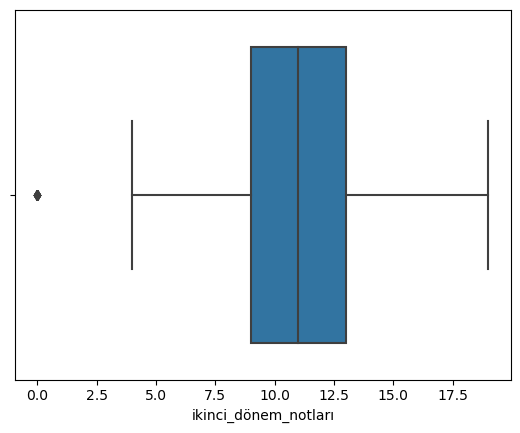

In [25]:
sns.boxplot(x=df["ikinci_dönem_notları"]);

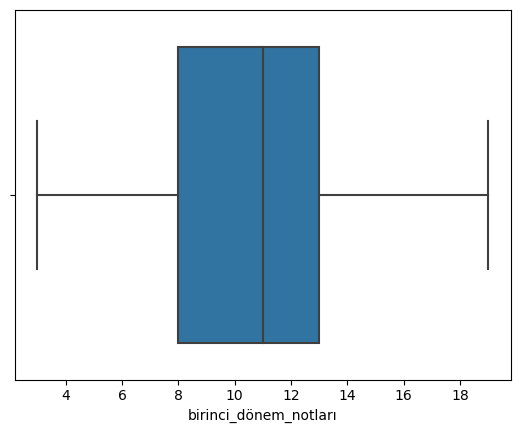

In [26]:
sns.boxplot(x=df["birinci_dönem_notları"]);

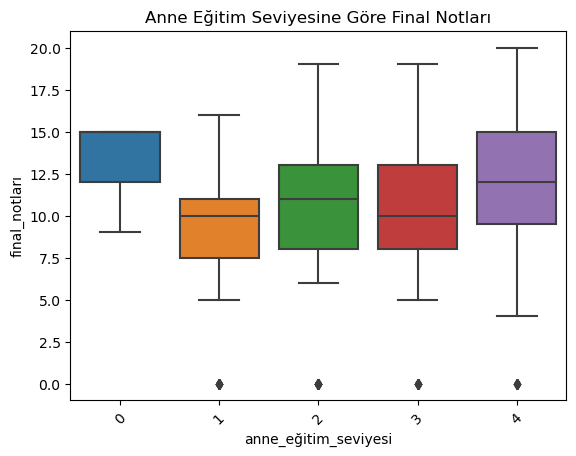

In [27]:
# Örnek: Anne eğitim seviyesine göre final notlarının kutu grafiği
sns.boxplot(x="anne_eğitim_seviyesi", y="final_notları", data=df)
plt.xticks(rotation=45)  # x eksenindeki etiketleri döndürmek için
plt.title("Anne Eğitim Seviyesine Göre Final Notları")
plt.show()

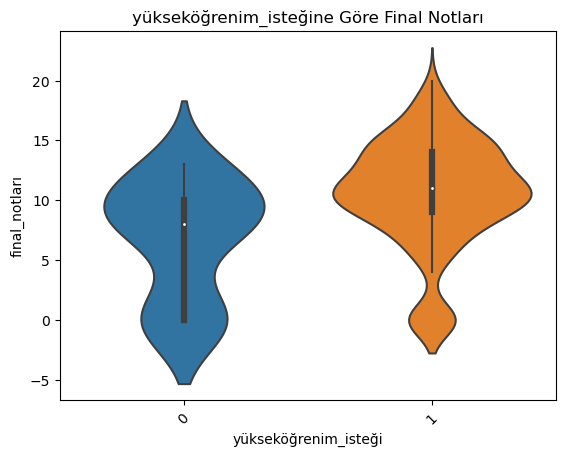

In [28]:
# violin grafiği
sns.violinplot(x="yükseköğrenim_isteği", y="final_notları", data=df)
plt.xticks(rotation=45)  # x eksenindeki etiketleri döndürmek için
plt.title("yükseköğrenim_isteğine Göre Final Notları")
plt.show()

<Axes: >

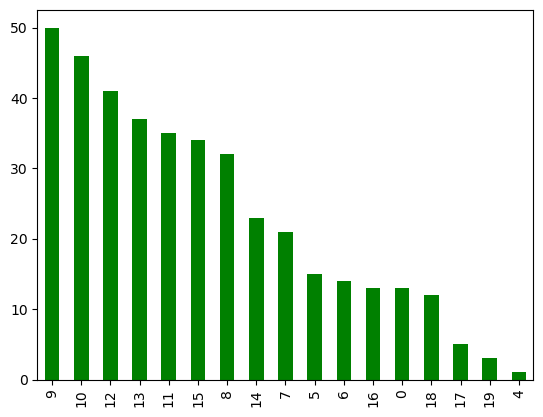

In [29]:
df["ikinci_dönem_notları"].value_counts().plot.bar(color="green")

In [30]:
df.tail(3)

,anne_eğitim_seviyesi,baba_eğitim_seviyesi,okula_seyahat_süresi,haftalık_çalışma_süresi,önceki_başarısızlık_sayısı,okul_desteği,aile_desteği,ek_ders_ücreti_ödeme,okul_dışı_aktiviteler,kreşe_devam,yükseköğrenim_isteği,internet_erişimi,romantik_ilişki,aile_ilişkileri,boş_zaman,dışarı_çıkma_sıklığı,hafta_içi_alkol_tüketimi,hafta_sonu_alkol_tüketimi,genel_sağlık_durumu,devamsızlık,birinci_dönem_notları,ikinci_dönem_notları,final_notları
392,1,1,1,1,3,0,0,0,0,0,1,0,0,5,5,3,3,3,3,3,10,8,7
393,3,2,3,1,0,0,0,0,0,0,1,1,0,4,4,1,3,4,5,0,11,12,10
394,1,1,1,1,0,0,0,0,0,1,1,1,0,3,2,3,3,3,5,5,8,9,9


## Feature Engineering

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 23 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   anne_eğitim_seviyesi        395 non-null    int64
 1   baba_eğitim_seviyesi        395 non-null    int64
 2   okula_seyahat_süresi        395 non-null    int64
 3   haftalık_çalışma_süresi     395 non-null    int64
 4   önceki_başarısızlık_sayısı  395 non-null    int64
 5   okul_desteği                395 non-null    int64
 6   aile_desteği                395 non-null    int64
 7   ek_ders_ücreti_ödeme        395 non-null    int64
 8   okul_dışı_aktiviteler       395 non-null    int64
 9   kreşe_devam                 395 non-null    int64
 10  yükseköğrenim_isteği        395 non-null    int64
 11  internet_erişimi            395 non-null    int64
 12  romantik_ilişki             395 non-null    int64
 13  aile_ilişkileri             395 non-null    int64
 14  boş_zaman 

## Modelleme

In [32]:
x = df.drop(columns=['final_notları'])
y = df['final_notları']

In [33]:
def fnc_all_regression_models(x,y):
    from sklearn.linear_model import LinearRegression
    from sklearn.linear_model import Ridge,Lasso
    from sklearn.linear_model import ElasticNet
    from sklearn.tree import ExtraTreeRegressor
    from sklearn.ensemble import GradientBoostingRegressor
    from sklearn.neighbors import KNeighborsRegressor
    
    from sklearn.model_selection import train_test_split

    from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
    
    
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

    L=LinearRegression()
    R=Ridge()
    Lass=Lasso()
    E=ElasticNet()
    ExTree=ExtraTreeRegressor()
    GBR=GradientBoostingRegressor()
    KN=KNeighborsRegressor()
    
    algos=[L,R,Lass,E,ExTree,GBR,KN]
    algo_names=['LinearRegression','Ridge','Lasso','ElasticNet','ExtraTreeRegressor','GradientBoostingRegressor','KNeighborsRegressor']
    r_squared=[]
    rmse=[]
    mae=[]
    
    result=pd.DataFrame(columns=['R_Squared','RMSE','MAE'],index=algo_names)
    
    for item in algos:
        item.fit(x_train,y_train)
        item.predict(x_test)
        r_squared.append(r2_score(y_test,item.predict(x_test)))
        rmse.append((mean_squared_error(y_test,item.predict(x_test)))**.5)
        mae.append(mean_absolute_error(y_test,item.predict(x_test)))
        
    result.R_Squared=r_squared
    result.RMSE=rmse
    result.MAE=mae
        
    return result.sort_values('R_Squared',ascending=False)

In [34]:
fnc_all_regression_models(x,y)

,R_Squared,RMSE,MAE
GradientBoostingRegressor,0.806304,1.992926,1.191228
ElasticNet,0.797307,2.038683,1.255544
Lasso,0.796559,2.042442,1.218076
Ridge,0.758786,2.223983,1.467698
LinearRegression,0.758094,2.227174,1.471824
KNeighborsRegressor,0.744453,2.289105,1.506329
ExtraTreeRegressor,0.622816,2.781039,1.607595


In [35]:
results = pd.DataFrame({
    'Model': ['GradientBoosting', 'ElasticNet', 'Lasso', 'Ridge', 'LinearRegression', 'KNeighbors', 'ExtraTree'],
    'R-Squared': [0.806304, 0.797307, 0.796559, 0.758786, 0.758094, 0.744453, 0.622816],
    'RMSE': [1.992926, 2.038683, 2.042442, 2.223983, 2.227174, 2.289105, 2.781039],
    'MAE': [1.191228, 1.255544, 1.218076, 1.467698, 1.471824, 1.506329, 1.607595]
})

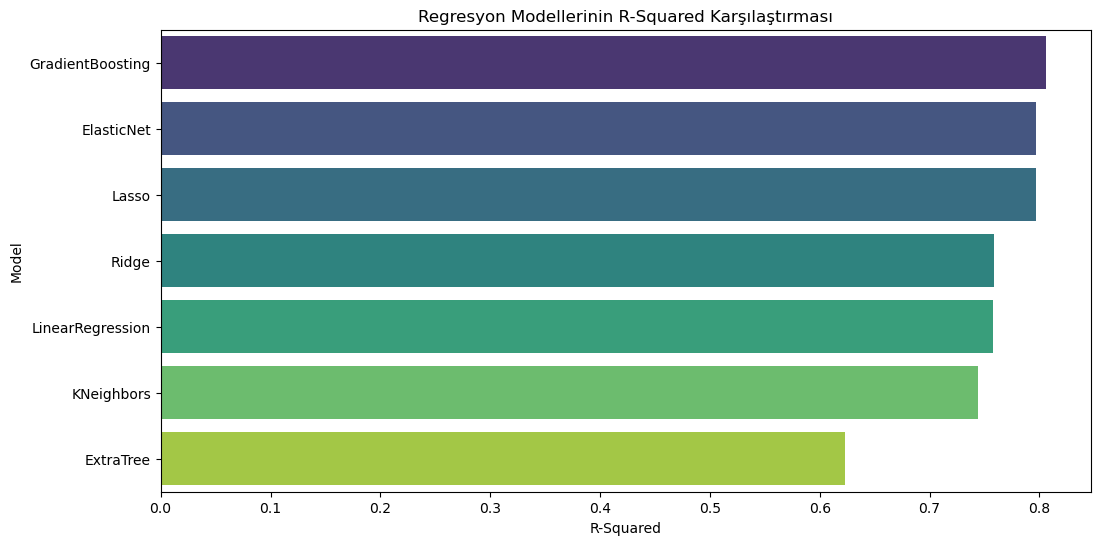

In [36]:
# Çubuk grafik oluşturma
plt.figure(figsize=(12, 6))
sns.barplot(x='R-Squared', y='Model', data=results, palette='viridis')
plt.xlabel('R-Squared')
plt.ylabel('Model')
plt.title('Regresyon Modellerinin R-Squared Karşılaştırması')
plt.show()

In [ ]:
# Verimiz a olduğu için derin öğrenmeye gerek duyulmayabilir.

**Çapraz Doğrulama (Cross-Validation):**
Çapraz doğrulama, veri setinizi farklı alt bölümlere böler ve modelin bu bölümlerde nasıl performans gösterdiğini değerlendirir. K-Fold Çapraz Doğrulama, bunlardan biridir. İşte K-Fold Çapraz Doğrulama için bir örnek:

In [38]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingRegressor

# Modeliniz
model = GradientBoostingRegressor()

# Çapraz doğrulama yapmak için kullanılan metrik (örneğin, R-kare)
scores = cross_val_score(model, x, y, cv=5)  # 5 katlı çapraz doğrulama
print("R-kare değerleri:", scores)
print("Ortalama R-kare:", scores.mean())

R-kare değerleri: [0.73758568 0.88755222 0.87986275 0.85034078 0.80137217]
Ortalama R-kare: 0.8313427207562357


**Grafikler ve Görselleştirmeler:**
Modelin tahminlerini gerçek değerlerle karşılaştırmak için scatter plot gibi grafikler kullanabilirsiniz. Örnek bir scatter plot:

In [41]:
from sklearn.ensemble import GradientBoostingRegressor

model = GradientBoostingRegressor()  # Modeli oluşturun
model.fit(x, y)  # Eğitim verileri ile modeli eğitin

GradientBoostingRegressor()

In [42]:
y_pred = model.predict(x)  # Test verileri üzerinde tahminler yapın

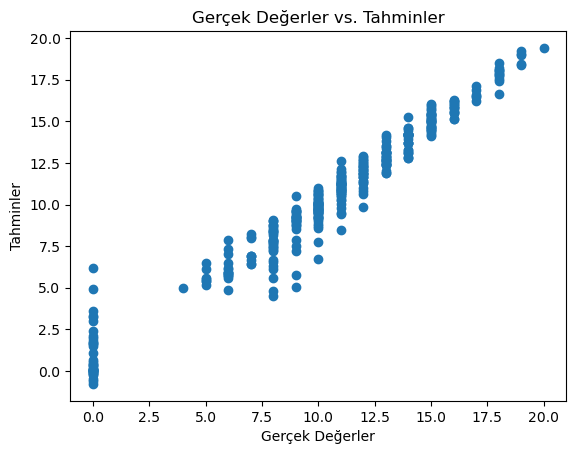

In [43]:
import matplotlib.pyplot as plt

# Model tahminleri
y_pred = model.predict(x)

# Scatter plot
plt.scatter(y, y_pred)
plt.xlabel("Gerçek Değerler")
plt.ylabel("Tahminler")
plt.title("Gerçek Değerler vs. Tahminler")
plt.show()

## Sonuç
Bu proje, öğrencilerin eğitim performansını tahmin etmek amacıyla çeşitli regresyon modellerinin kullanıldığı bir makine öğrenimi uygulamasıdır. Veri analizi, veri ön işleme, model eğitimi ve performans değerlendirmesi adımları üzerinde çalışılmış ve farklı regresyon modellerinin final notlarını tahmin etme yetenekleri karşılaştırılmıştır.

Sonuç olarak, projede kullanılan regresyon modellerinin performansı incelendiğinde, Gradient Boosting Regressor modelinin en yüksek R-kare (R-Squared) değerine sahip olduğu görülmüştür. Bu, öğrenci notlarını tahmin etmek için bu modelin daha uygun olduğunu göstermektedir. Ancak, modelin daha fazla incelemeye ve iyileştirmeye ihtiyaç duyabileceği de belirtilmelidir.

Bu projenin sonucunda, öğrencilerin eğitim performansını tahmin etmek için kullanılabilecek bir regresyon modelinin oluşturulduğu ve bu modelin daha fazla veri ve özelliklerle geliştirilebileceği sonucuna ulaşılmıştır. Bu çalışma, eğitim alanında öğrenci başarısını tahmin etme konusundaki potansiyeli göstermektedir.